In [1]:
from tbi.convert import convert
from tbi.preprocessing import preprocessing
from tbi.skull_strip import skull_strip
from tbi.segmentation import segmentation
from tbi.label_geometry_measures import label_geometry_measures
from tbi.image_intensity_stat_jac import image_intensity_stat_jac

from glob import glob
from nilearn.plotting import plot_img
from os.path import join

import os


/usr/local/lib/python3.5/dist-packages/nilearn/__init__.py:68: FutureWarning: Python 3.5 support is deprecated and will be removed in a future release. Consider switching to Python 3.6 or 3.7
  _python_deprecation_warnings()


In [2]:
dcmfiles = '/data/BR-1001/*/*/'
output = '/data/out'
mni_file = '/data/MNI152_T1_1mm_brain.nii'
atlas_file = '/data/New_atlas_cort_asym_sub.nii.gz'
template_file = '/data/TemplateYoungM_128.nii.gz'

In [3]:
convert_dir = join(output, 'convert')
convert_args = ['-i', 
                dcmfiles, 
                convert_dir
               ]
convert(convert_args)

2020-08-06 02:37:38,817 :: tbi.convert :: INFO :: Using args:Namespace(input='/data/BR-1001/*/*/', output='/data/out/convert')
2020-08-06 02:37:38,843 :: tbi.convert :: INFO :: Processing folder /data/BR-1001/Ct Head W-O Contrast 5673454104517364 20100714/HEAD ROUT 5.0 H30s 2 120000/
2020-08-06 02:37:40,553 :: tbi.convert :: INFO :: Saved /data/out/convert/HEAD_ROUT_5_0_H30s_2_120000.nii
2020-08-06 02:37:40,557 :: tbi.convert :: INFO :: Exiting!


Plotting HEAD_ROUT_5_0_H30s_2_120000.nii


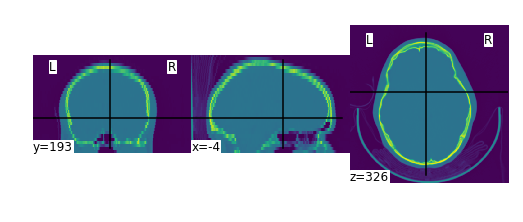

In [4]:
nii_files = os.listdir(convert_dir)

for nii_file in nii_files:
    print('Plotting {0}'.format(nii_file))
    plot_img(join(convert_dir, nii_file))

In [5]:
preprocessing_dir = join(output, 'preprocessing')
preprocessing_args = ['-i', 
                      join(convert_dir, '*.nii'), 
                      '-m', 
                      mni_file, 
                      preprocessing_dir
                     ]
preprocessing(preprocessing_args)

2020-08-06 02:37:42,633 :: tbi.preprocessing :: INFO :: Using args:Namespace(input='/data/out/convert/*.nii', mni_file='/data/MNI152_T1_1mm_brain.nii', output='/data/out/preprocessing')
2020-08-06 02:37:42,681 :: tbi.preprocessing :: INFO :: Processing file /data/out/convert/HEAD_ROUT_5_0_H30s_2_120000.nii
2020-08-06 02:45:10,762 :: tbi.preprocessing :: INFO :: Saved /data/out/preprocessing/HEAD_ROUT_5_0_H30s_2_120000
2020-08-06 02:45:10,765 :: tbi.preprocessing :: INFO :: Exiting!


Plotting HEAD_ROUT_5_0_H30s_2_120000_normalizedInverseWarped.nii.gz
Plotting HEAD_ROUT_5_0_H30s_2_120000_normalizedWarped.nii.gz


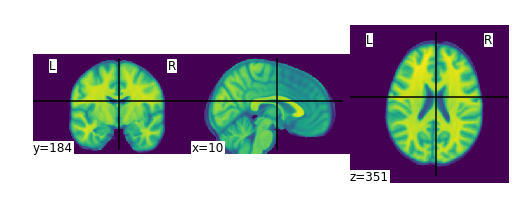

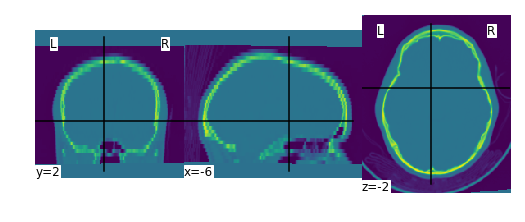

In [6]:
nii_files = os.listdir(preprocessing_dir)

for nii_file in nii_files:
    if nii_file.endswith(".nii.gz"):
        print('Plotting {0}'.format(nii_file))
        plot_img(join(preprocessing_dir, nii_file))
        

In [7]:
skull_strip_dir = join(output, 'skull_strip')
skull_strip_args = ['-i', 
                    join(preprocessing_dir, '*_normalizedWarped.nii.gz'),
                    skull_strip_dir
                   ]
skull_strip(skull_strip_args)

2020-08-06 02:45:14,946 :: tbi.skull_strip :: INFO :: Arguments: Namespace(input='/data/out/preprocessing/*_normalizedWarped.nii.gz', output='/data/out/skull_strip')
2020-08-06 02:45:14,979 :: tbi.skull_strip :: INFO :: Processing file /data/out/preprocessing/HEAD_ROUT_5_0_H30s_2_120000_normalizedWarped.nii.gz
2020-08-06 02:45:50,495 :: tbi.skull_strip :: INFO :: Exiting!


Plotting HEAD_ROUT_5_0_H30s_2_120000_brain.nii.gz


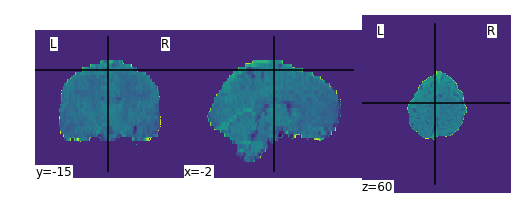

In [8]:
nii_files = os.listdir(skull_strip_dir)

for nii_file in nii_files:
    print('Plotting {0}'.format(nii_file))
    plot_img(join(skull_strip_dir, nii_file))

In [9]:
skulls = join(skull_strip_dir, '*_brain.nii.gz')
segmentation_dir = join(output, 'segmentation')
segmentation_args = ['-i', 
                     skulls, 
                     '-t', template_file, 
                     '-a', 
                     atlas_file, 
                     segmentation_dir
                    ]
segmentation(segmentation_args)

2020-08-06 02:45:51,988 :: tbi.segmentation :: INFO :: Arguments: Namespace(atlas_file='/data/New_atlas_cort_asym_sub.nii.gz', input='/data/out/skull_strip/*_brain.nii.gz', output='/data/out/segmentation', template_file='/data/TemplateYoungM_128.nii.gz')
2020-08-06 02:45:52,007 :: tbi.segmentation :: INFO :: Processing /data/out/skull_strip/HEAD_ROUT_5_0_H30s_2_120000_brain.nii.gz
2020-08-06 02:45:52,020 :: tbi.segmentation :: INFO :: Registering /data/out/skull_strip/HEAD_ROUT_5_0_H30s_2_120000_brain.nii.gz
2020-08-06 02:56:22,755 :: tbi.segmentation :: INFO :: Physical: 22.7646427154541
2020-08-06 02:56:53,317 :: tbi.segmentation :: INFO :: Affine: 30.558831691741943
2020-08-06 02:56:53,320 :: tbi.segmentation :: INFO :: Exiting!


/data/out/segmentation/SEG/PHYSCi/HEAD_ROUT_5_0_H30s_2_120000_segmentation_cortical_phy.nii.gz
/data/out/segmentation/SEG/AFFINE/HEAD_ROUT_5_0_H30s_2_120000_segmentation_cortical_affine.nii.gz


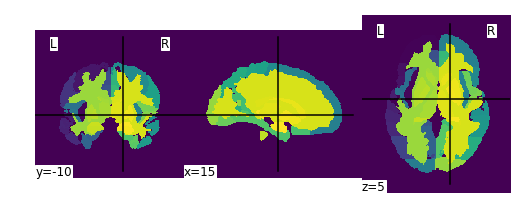

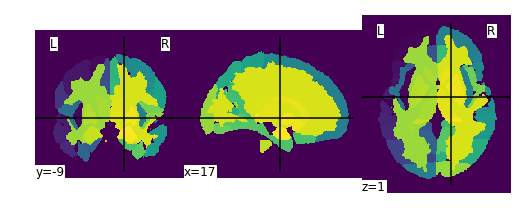

In [10]:
nii_files = glob(join(segmentation_dir, 'SEG/*/*.nii.gz'))
for nii_file in nii_files:
    print(nii_file)
    plot_img(nii_file)

In [11]:
nii_files = glob(join(segmentation_dir, 'REGIS/Affine2SyN/*affine2Syn1Warp.nii.gz'))
for nii_file in nii_files:
    print(nii_file)
    #Need to figure out how to plot this 5 dimension image
    #plot_img(nii_file)


/data/out/segmentation/REGIS/Affine2SyN/HEAD_ROUT_5_0_H30s_2_120000_preprocessed_affine2Syn1Warp.nii.gz


In [12]:
label_geometry_measures_dir = join(output, 'label_geometry_measures')
label_geometry_measures_args = ['-i', 
                                join(segmentation_dir, 'SEG/*/*.nii.gz'),
                                label_geometry_measures_dir
                               ]
label_geometry_measures(label_geometry_measures_args)

2020-08-06 02:56:56,054 :: tbi.label_geometry_measures :: INFO :: Processing file name:  /data/out/segmentation/SEG/PHYSCi/HEAD_ROUT_5_0_H30s_2_120000_segmentation_cortical_phy.nii.gz
2020-08-06 02:56:56,057 :: tbi.label_geometry_measures :: INFO :: Saving to file name: /data/out/label_geometry_measures/HEAD_ROUT_5_0_H30s_2_120000_segmentation_cortical_phy.txt
2020-08-06 02:56:57,430 :: tbi.label_geometry_measures :: INFO :: Processing file name:  /data/out/segmentation/SEG/AFFINE/HEAD_ROUT_5_0_H30s_2_120000_segmentation_cortical_affine.nii.gz
2020-08-06 02:56:57,433 :: tbi.label_geometry_measures :: INFO :: Saving to file name: /data/out/label_geometry_measures/HEAD_ROUT_5_0_H30s_2_120000_segmentation_cortical_affine.txt


In [13]:
image_intensity_stat_jac_dir = join(output, 'image_intensity_stat_jac')

image_intensity_stat_jac_args = ['-i', 
                                 join(segmentation_dir, 'REGIS/Affine2SyN/*affine2Syn1Warp.nii.gz'), 
                                 '-t',
                                 atlas_file,
                                 image_intensity_stat_jac_dir
                                ]

image_intensity_stat_jac(image_intensity_stat_jac_args)

2020-08-06 02:56:59,180 :: tbi.image_intensity_stat_jac :: INFO :: Processing file name:  /data/out/segmentation/REGIS/Affine2SyN/HEAD_ROUT_5_0_H30s_2_120000_preprocessed_affine2Syn1Warp.nii.gz
2020-08-06 02:56:59,183 :: tbi.image_intensity_stat_jac :: INFO :: Saving to file name: /data/out/image_intensity_stat_jac/HEAD_ROUT_5_0_H30s_2_120000_preprocessed_affine2Syn1Warp.txt
